# Chapter 4: Classification and regression

## Classifying movie reviews

In [59]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [60]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
  [reverse_word_index.get(i-3, "/") for i in train_data[0]]
)
print(decoded_review)

/ this film was just brilliant casting / / story direction / really / the part they played and you could just imagine being there robert / is an amazing actor and now the same being director / father came from the same / / as myself so i loved the fact there was a real / with this film the / / throughout the film were great it was just brilliant so much that i / the film as soon as it was released for / and would recommend it to everyone to watch and the / / was amazing really / at the end it was so sad and you know what they say if you / at a film it must have been good and this definitely was also / to the two little / that played the / of / and paul they were just brilliant children are often left out of the / / i think because the stars that play them all / up are such a big / for the whole film but these children are amazing and should be / for what they have done don't you think the whole story was so / because it was true and was / life after all that was / with us all


### Preparing the data

Data needs to be formatted as one hot encoding because neural networks can process list of integers. 

#### One hot encoding data

In [61]:
import numpy as np

def vectorize_sequence(data, dimensions):
  vectorized_data = np.zeros((len(data), dimensions))
  for i, sequence in enumerate(data):
    for index in sequence:
      vectorized_data[i, index] = 1
  return vectorized_data

In [62]:
ohe_train_data = vectorize_sequence(train_data, 10_000)
ohe_test_data = vectorize_sequence(test_data, 10_000)

#### One hot encoding labels

In [63]:
ohe_train_labels = np.asarray(train_labels, dtype='float32')
ohe_test_labels = np.asarray(test_labels, dtype='float32')

### Creating the model

In [64]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

### Validating the model

#### Creating validation data

In [65]:
validation_data = ohe_train_data[:10_000]
validation_labels = ohe_train_labels[:10_000]
partial_train_data = ohe_train_data[10_000:]
partial_train_labels = ohe_train_labels[10_000:]

In [66]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=4,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6463 - loss: 0.6352 - val_accuracy: 0.8081 - val_loss: 0.4942
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8375 - loss: 0.4496 - val_accuracy: 0.8470 - val_loss: 0.3896
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8580 - loss: 0.3705 - val_accuracy: 0.8532 - val_loss: 0.3543
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8704 - loss: 0.3290 - val_accuracy: 0.8592 - val_loss: 0.3427


In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

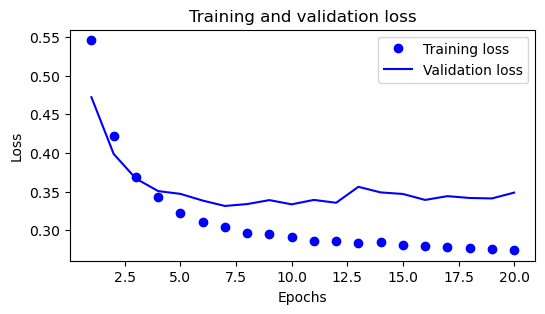

In [86]:
import matplotlib.pyplot as plt
def plot_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values)+1)
  plt.figure(figsize=(6,3))
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
plot_loss(history)

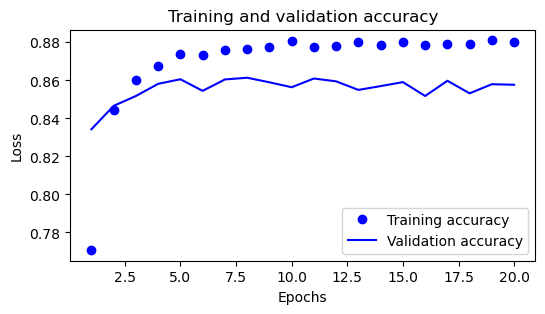

In [83]:
def plot_accuracy(history):
  history_dict = history.history
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc_values)+1)
  plt.figure(figsize=(6,3))
  plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_accuracy(history)

In [72]:
results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8536 - loss: 0.3480
[0.3446020781993866, 0.8558400273323059]


### Further experiments

#### Using One representation layer

The results obtained in this experiment are very similar to the ones obtained using 2 layers.

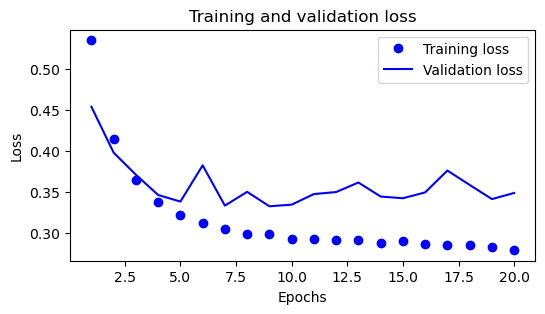

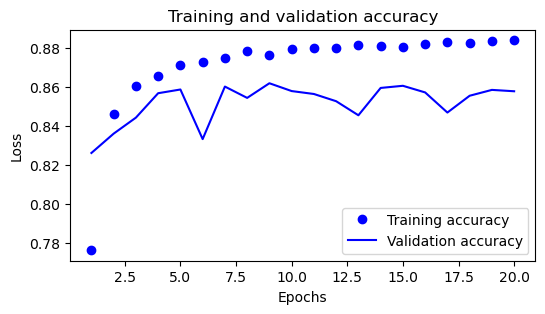

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8486 - loss: 0.3580
[0.35210952162742615, 0.8519200086593628]


In [91]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=0)

plot_loss(history)
plot_accuracy(history)

results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)

#### Using 3 representation layers

Pretty similar results, but a little bit more overfitting. 

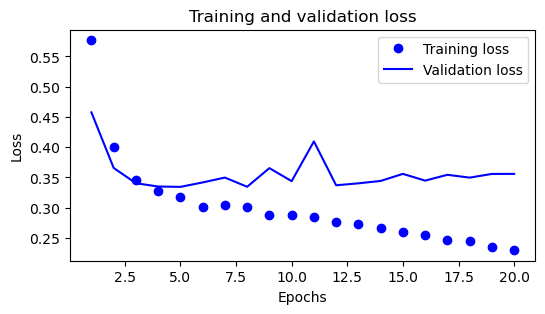

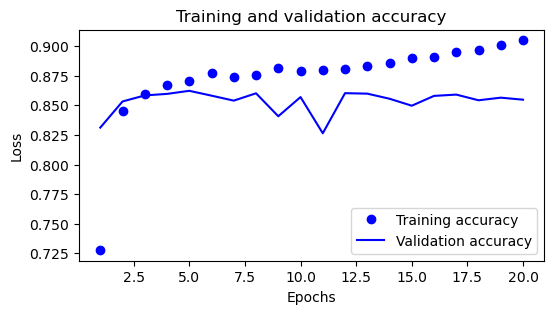

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.8453 - loss: 0.3621
[0.35525327920913696, 0.8484399914741516]


In [94]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=0)

plot_loss(history)
plot_accuracy(history)

results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)

#### Using more units (64 units)

Accuracy goes way down and data is overfitting a lot

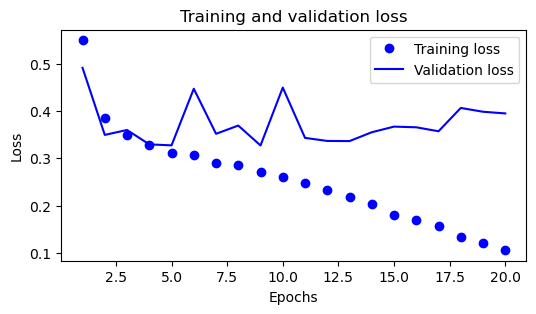

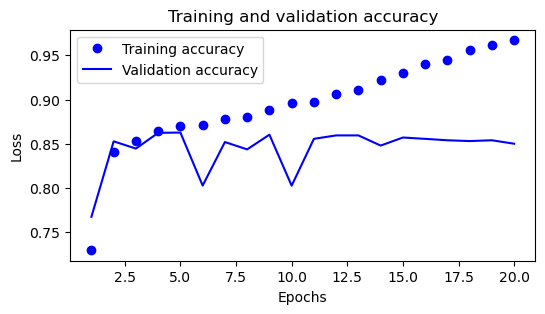

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8449 - loss: 0.3977
[0.39041978120803833, 0.8472800254821777]


In [95]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=0)

plot_loss(history)
plot_accuracy(history)

results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)

#### Using MSE loss function

The loss is lower when using the Mean Squared Error loss, but accuracy seems to be quite similar.

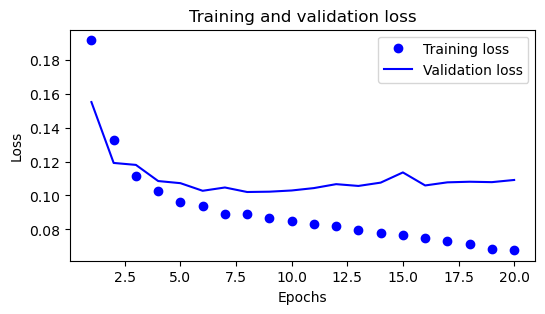

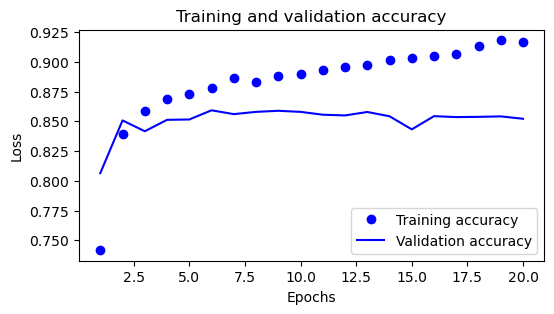

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.8459 - loss: 0.1116
[0.10996420681476593, 0.849560022354126]


In [96]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='mse',
  metrics=['accuracy']
)

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=0)

plot_loss(history)
plot_accuracy(history)

results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)

#### Using Tahn activation

Similar results, it just took longer.

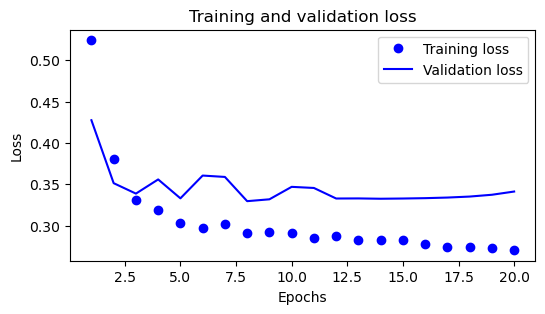

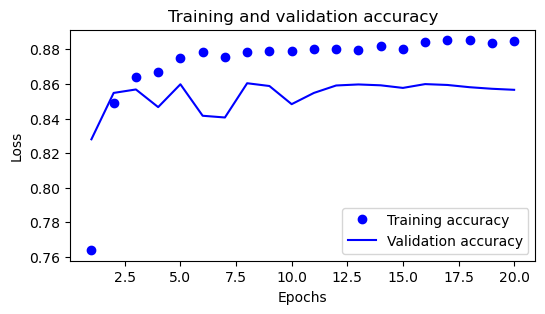

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.8469 - loss: 0.3497
[0.34349387884140015, 0.8509600162506104]


In [98]:
model = keras.Sequential([
  layers.Dense(16, activation='tanh'),
  layers.Dense(16, activation='tanh'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=0)

plot_loss(history)
plot_accuracy(history)

results = model.evaluate(ohe_test_data, ohe_test_labels)
print(results)